In [1]:
from manim import *
from scipy.optimize import fsolve
import numpy as np
import random

config.media_width = "75%"
config.verbosity = "WARNING"

Manim Community v0.18.0

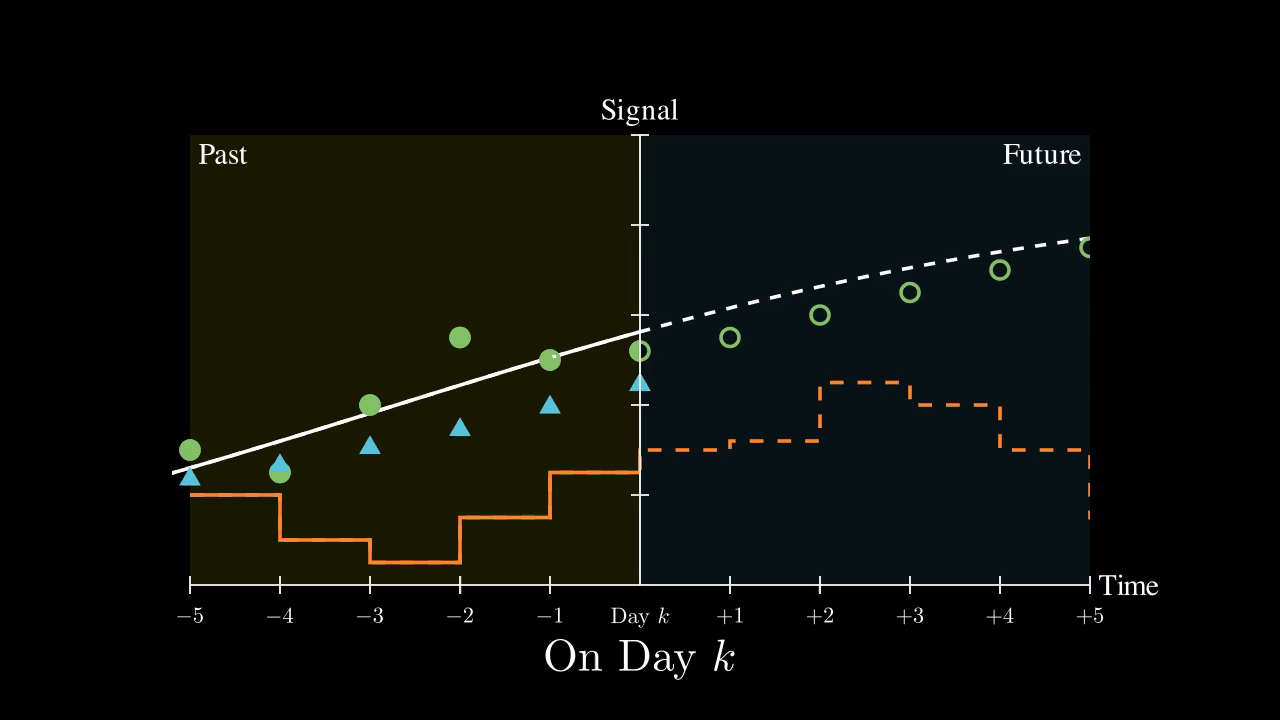

In [305]:
%%manim -qm --format=gif mpc

class mpc(Scene):

    def get_rectangle_corners(self, bottom_left, top_right):
        return [
            (top_right[0], top_right[1]),
            (bottom_left[0], top_right[1]),
            (bottom_left[0], bottom_left[1]),
            (top_right[0], bottom_left[1]),
        ]    

    def construct(self):

        axes = Axes(
            x_range=[-5, 5, 1],
            y_range=[0, 5, 1],
            x_length=10,
            y_length=5,
            tips=False,
            axis_config={"include_numbers": False},
        )

        y_label = Text("Signal", color=WHITE).scale(0.5)    
        y_label.next_to(axes.y_axis, UP, buff=0.1)
        x_label = Text("Time", color=WHITE).scale(0.5)    
        x_label.next_to(axes.x_axis, RIGHT, buff=0.1)

        x_labels_array = [
            "$-5$","$-4$","$-3$","$-2$","$-1$","Day $k$",
            "$+1$","$+2$","$+3$","$+4$","$+5$","$+6$"]
        x_labels = VGroup()
        for x_val, label_text in zip(range(-5, 7), x_labels_array):
            label = Tex(label_text).scale(0.5)  # You can customize the scale
            label.next_to(axes.coords_to_point(x_val, 0), DOWN)
            x_labels.add(label)

        past = Rectangle(
            height=5,
            width=5,
            stroke_opacity=0,  # No border
            fill_opacity=0.1,  # Transparency level
            fill_color=YELLOW,  # Rectangle color
        ).move_to(axes.c2p(-2.5,2.5))   
        past_text = Text("Past", color=WHITE).scale(0.5)
        past_text.next_to(past.get_corner(UL), DOWN+RIGHT,buff=0.1)

        future = Rectangle(
            height=5,
            width=5,
            stroke_opacity=0,  # No border
            fill_opacity=0.1,  # Transparency level
            fill_color=BLUE,  # Rectangle color
        ).move_to(axes.c2p(2.5,2.5))   
        future_text = Text("Future", color=WHITE).scale(0.5)
        future_text.next_to(future.get_corner(UR), DOWN+LEFT,buff=0.1)     

        # Add dynamic caption below the axes
        def caption(new_text,new_color):
            return Tex(new_text, color=new_color).next_to(axes, DOWN, buff=0.5).scale(1)

        # Create the masks
        mask_left_out = Rectangle(height=5,width=2,stroke_opacity=0,fill_opacity=1,fill_color=BLACK).move_to(axes.c2p(-6.2,2.5))
        mask_left_in = Rectangle(height=5,width=5,stroke_opacity=0,fill_opacity=1,fill_color=BLACK).move_to(axes.c2p(-2.5,2.5))
        mask_right_out = Rectangle(height=5,width=2,stroke_opacity=0,fill_opacity=1,fill_color=BLACK).move_to(axes.c2p(6,2.5))
        mask_right_in = Rectangle(height=5,width=5,stroke_opacity=0,fill_opacity=1,fill_color=BLACK).move_to(axes.c2p(2.5,2.5))
        mask_left_tick = Rectangle(height=1,width=2,stroke_opacity=0,fill_opacity=1,fill_color=BLACK).move_to(axes.c2p(-6.2,-0.5))    
        mask_right_tick = Rectangle(height=1,width=2,stroke_opacity=0,fill_opacity=1,fill_color=BLACK).move_to(axes.c2p(6.2,-0.5))    

        # Setpoint
        setpoint_curve = ParametricFunction(lambda t: [t, 10 / (2 + np.exp(-0.25*t)), 0], t_range=[-6, 6], color=WHITE).move_to(axes.coords_to_point(0,2.5))  
        dashed_setpoint = DashedVMobject(setpoint_curve,num_dashes=50)

        # States        
        initial_state_coor = [(-5, 1.2), (-4, 1.35), (-3, 1.55), (-2, 1.75), (-1, 2), (0,2.25)]
        new_state_coor = [(-5, 1.35), (-4, 1.55), (-3, 1.85), (-2, 2.15), (-1, 2.45), (0,2.9)]
        
        initial_states = VGroup(*[Triangle(color=BLUE,fill_opacity=1,radius=0.1).move_to(axes.coords_to_point(coord[0],coord[1])) for coord in initial_state_coor])
        new_states = VGroup(*[Triangle(color=BLUE,fill_opacity=1,radius=0.1).move_to(axes.coords_to_point(coord[0],coord[1])) for coord in new_state_coor])
        
        # Outputs
        initial_output_coor = [(-5, 1.5), (-4, 1.25), (-3, 2), (-2, 2.75), (-1, 2.5), (0,2.6), (1,2.75), (2,3), (3,3.25), (4,3.5), (5,3.75), (6,3.85)]
        predicted_output_coor = [(-5, 1.5), (-4, 1.25), (-3, 2), (-2, 2.75), (-1, 2.5), (0,2.9), (1,3), (2,3.1), (3,3.25), (4,3.4), (5,3.55), (6,3.85)]
        controlled_output_coor = [(-5, 1.5), (-4, 1.25), (-3, 2), (-2, 2.75), (-1, 2.5), (0,2.9),(1,3), (2,3.3), (3,3.5), (4,3.65), (5,3.75), (6,3.85)]

        initial_outputs = VGroup(*[Circle(color=GREEN,fill_opacity=1,radius=0.1).move_to(axes.coords_to_point(coord[0],coord[1])) for coord in initial_output_coor])
        dashed_initial_outputs = VGroup(*[Circle(color=GREEN,fill_opacity=0,radius=0.1).move_to(axes.coords_to_point(coord[0],coord[1])) for coord in initial_output_coor])
        
        predicted_outputs = VGroup(*[Circle(color=GREEN,fill_opacity=1,radius=0.1).move_to(axes.coords_to_point(coord[0],coord[1])) for coord in predicted_output_coor])
        dashed_predicted_outputs = VGroup(*[Circle(color=GREEN,fill_opacity=0,radius=0.1).move_to(axes.coords_to_point(coord[0],coord[1])) for coord in predicted_output_coor])

        controlled_outputs = VGroup(*[Circle(color=GREEN,fill_opacity=1,radius=0.1).move_to(axes.coords_to_point(coord[0],coord[1])) for coord in controlled_output_coor])
        dashed_controlled_outputs = VGroup(*[Circle(color=GREEN,fill_opacity=0,radius=0.1).move_to(axes.coords_to_point(coord[0],coord[1])) for coord in controlled_output_coor])


        # Inputs
        initial_input_coor = [
            (-5,1),(-4,1),(-4,0.5),(-3,0.5),(-3,0.25),(-2,0.25),(-2,0.75),(-1,0.75),(-1,1.25),(0,1.25),
            (0,1.5),(1,1.5),(1,1.6),(2,1.6),(2,2.25),(3,2.25),(3,2),(4,2),(4,1.5),(5,1.5),(5,0.75),(6,0.75)]
        new_input_coor = [
            (-5,1),(-4,1),(-4,0.5),(-3,0.5),(-3,0.25),(-2,0.25),(-2,0.75),(-1,0.75),(-1,1.25),(0,1.25),
            (0,1.5),(1,1.5),(1,2),(2,2),(2,2.25),(3,2.25),(3,1.75),(4,1.75),(4,1.5),(5,1.5),(5,0.5),(6,0.5)]
        initial_inputs = VMobject(color=ORANGE)
        initial_inputs.set_points_as_corners([axes.coords_to_point(coord[0],coord[1]) for coord in initial_input_coor])
        dashed_initial_inputs = DashedVMobject(initial_inputs,num_dashes=50)
        new_inputs = VMobject(color=ORANGE)
        new_inputs.set_points_as_corners([axes.coords_to_point(coord[0],coord[1]) for coord in new_input_coor])
        dashed_new_inputs = DashedVMobject(new_inputs,num_dashes=50)

        # Prediction 
        initial_prediction = ParametricFunction(lambda t: [t, 10 / (2 + np.exp(-0.25*t)), 0], t_range=[-6, 6], color=WHITE).move_to(axes.coords_to_point(0,2.5))  
        dashed_setpoint = DashedVMobject(setpoint_curve,num_dashes=50)

        # Backgrounds
        self.add(past,past_text)

        # Right content
        self.add(setpoint_curve,initial_inputs)
        self.add(initial_outputs)
        
        # Left mask
        self.add(mask_right_in)
        self.add(future,future_text)
        
        # Content on the left
        self.add(dashed_setpoint,dashed_initial_inputs,dashed_initial_outputs,initial_states)
        
        # Right mask
        self.add(mask_left_out,mask_right_out)
        
        # Content on the right
        initial_caption =  caption("On Day $k$",WHITE)
        self.add(x_labels)
        self.add(mask_left_tick,mask_right_tick)
        self.add(axes, x_label,y_label,initial_caption)

        self.wait(2)
        self.play(
            Transform(initial_states,new_states),
            Transform(initial_caption,caption("State estimation",BLUE))
            )

        self.wait(2)
        self.play(
            Transform(initial_outputs,predicted_outputs),Transform(dashed_initial_outputs,dashed_predicted_outputs),
            Transform(initial_caption,caption("Prediction",GREEN))
            )
        
        self.wait(2)
        self.play(
            Transform(initial_inputs,new_inputs),Transform(dashed_initial_inputs,dashed_new_inputs),
            Transform(initial_outputs,controlled_outputs),Transform(dashed_initial_outputs,dashed_controlled_outputs),
            Transform(initial_caption,caption("Model predictive control",ORANGE))
            )
        
        self.wait(2)
        self.play(
            x_labels.animate.shift(1 * LEFT),
            dashed_setpoint.animate.shift(1 * LEFT),setpoint_curve.animate.shift(1 * LEFT),
            initial_outputs.animate.shift(1 * LEFT),dashed_initial_outputs.animate.shift(1 * LEFT),
            initial_states.animate.shift(1 * LEFT),
            initial_inputs.animate.shift(1 * LEFT),dashed_initial_inputs.animate.shift(1 * LEFT),
            Transform(initial_caption,caption("Repeat on Day $k+1$",WHITE))
            )

        self.wait(2)     

        